**Group-10**

Members:
1. Robayed Mahmud Rohan, ID: 22-49475-3
2. Saumik Saha Niloy, ID:22-49479-3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9']

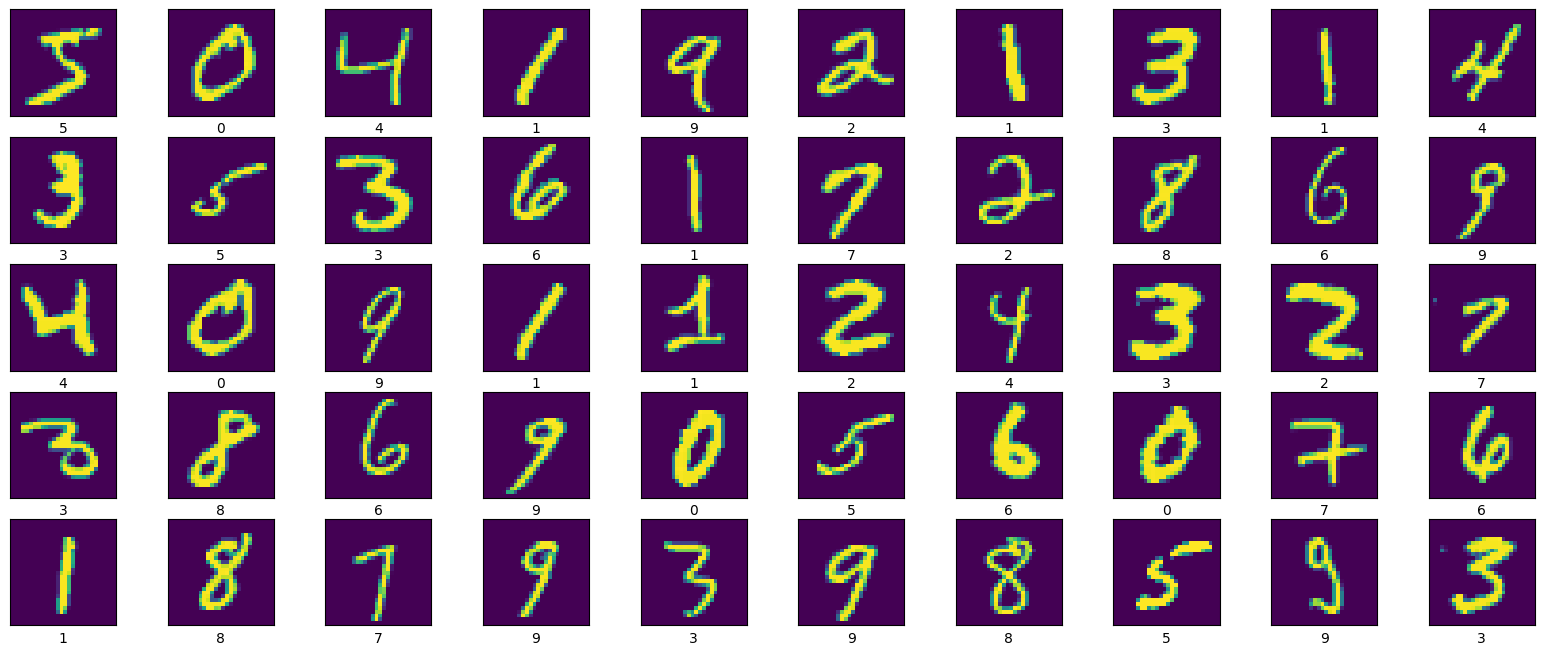

In [ ]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i]])

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

X_train, X_test = X_train / 255.0, X_test / 255.0

#Add channel dimension (28,28) -> (28,28,1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Convert grayscale (1 channel) to RGB (3 channels)
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train, dtype=tf.float32))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test, dtype=tf.float32))

In [ ]:
model = keras.Sequential([
    #Input layer
    keras.Input(shape=(32,32,3)),

    #Hidden layers
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    #Output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,186 (1.11 MB)

 Trainable params: 290,186 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8399 - loss: 0.5045 - val_accuracy: 0.9848 - val_loss: 0.0496
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9837 - loss: 0.0501 - val_accuracy: 0.9875 - val_loss: 0.0423
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9899 - val_loss: 0.0351
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9936 - loss: 0.0174 - val_accuracy: 0.9896 - val_loss: 0.0354
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9891 - val_loss: 0.0392
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9962 - loss: 0.0107 - val_accuracy: 0.9887 - val_loss: 0.0437
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 

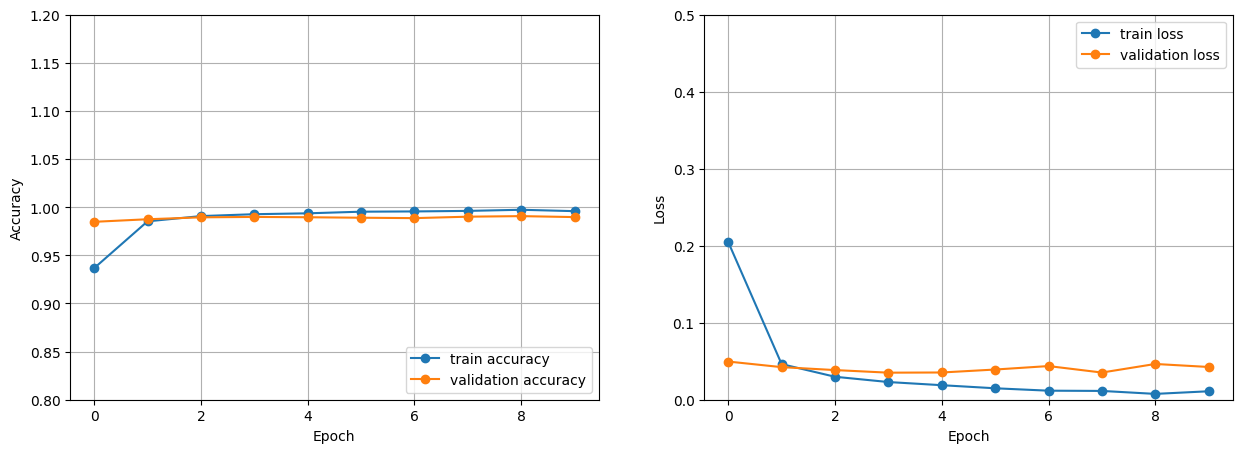

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim([0.8,1.2])

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.ylim([0,0.5])

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0477

Test Accuracy: 0.9878000020980835

Test Loss: 0.03902571275830269


In [ ]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
#Capturing image code
import numpy as np
import cv2
import tensorflow as tf
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=1.0):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      video.remove();
      capture.remove();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


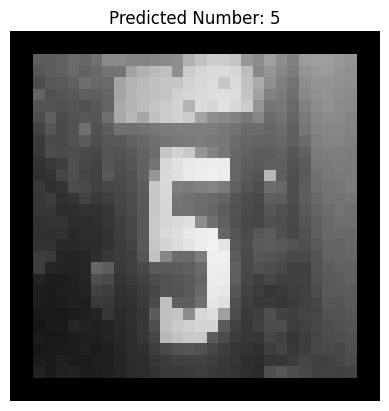

In [ ]:
filename = take_photo()

# Preprocessing image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
img = np.expand_dims(img, axis=-1)
img = np.pad(img, ((2,2),(2,2),(0,0)), 'constant')
img = tf.image.grayscale_to_rgb(tf.convert_to_tensor(img, dtype=tf.float32))
img = img / 255.0
img = np.expand_dims(img, axis=0)

#prediction
predictions = model.predict(img)
number = np.argmax(predictions)

#output
plt.imshow(img[0])
plt.title(f'Predicted Number: {number}')
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


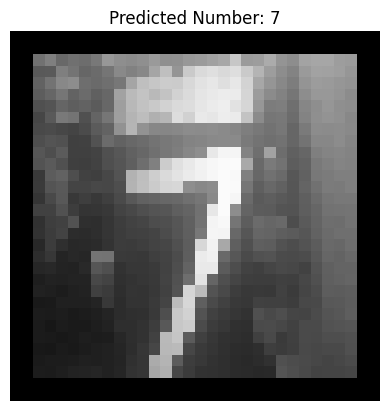

In [ ]:
filename = take_photo()

# Preprocessing image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
img = np.expand_dims(img, axis=-1)
img = np.pad(img, ((2,2),(2,2),(0,0)), 'constant')
img = tf.image.grayscale_to_rgb(tf.convert_to_tensor(img, dtype=tf.float32))
img = img / 255.0
img = np.expand_dims(img, axis=0)

#prediction
predictions = model.predict(img)
number = np.argmax(predictions)

#output
plt.imshow(img[0])
plt.title(f'Predicted Number: {number}')
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


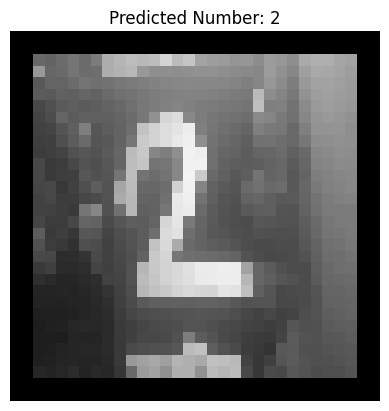

In [ ]:
filename = take_photo()

# Preprocessing image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
img = np.expand_dims(img, axis=-1)
img = np.pad(img, ((2,2),(2,2),(0,0)), 'constant')
img = tf.image.grayscale_to_rgb(tf.convert_to_tensor(img, dtype=tf.float32))
img = img / 255.0
img = np.expand_dims(img, axis=0)

#prediction
predictions = model.predict(img)
number = np.argmax(predictions)

#output
plt.imshow(img[0])
plt.title(f'Predicted Number: {number}')
plt.axis('off')
plt.show()

## Numbers should be written on black surface (like https://onlineboard.eu)